<a href="https://colab.research.google.com/github/acsontfd/Travel-Insurance-Prediction/blob/main/Assignment_2_MLPC_G14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#installations
!pip install imbalanced-learn

#GUI & googledrive (dataset)
get_ipython().system('pip install gradio -q')
get_ipython().system('pip install gdown')

#GUI
import gradio as gr
import gdown
import requests

#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sklearn

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from imblearn.over_sampling import ADASYN

#decision tree
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#KNearestNeighbour
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.4 MB/s

In [ ]:
#loading file
file_id = "1lvDJJH34MgkwUvxJAX0d89PUHzXoLG2T"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "TravelInsurancePrediction.csv", quiet=False)

df = pd.read_csv("TravelInsurancePrediction.csv", sep=",")

Downloading...
From: https://drive.google.com/uc?id=1lvDJJH34MgkwUvxJAX0d89PUHzXoLG2T
To: /content/TravelInsurancePrediction.csv
100%|██████████| 115k/115k [00:00<00:00, 67.3MB/s]


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 2 MLPC/TravelInsurancePrediction.csv')
df.head(10)

ID  Age               Employment Type GraduateOrNot  AnnualIncome  \
0   0   31             Government Sector           Yes        400000   
1   1   31  Private Sector/Self Employed           Yes       1250000   
2   2   34  Private Sector/Self Employed           Yes        500000   
3   3   28  Private Sector/Self Employed           Yes        700000   
4   4   28  Private Sector/Self Employed           Yes        700000   
5   5   25  Private Sector/Self Employed            No       1150000   
6   6   31             Government Sector           Yes       1300000   
7   7   31  Private Sector/Self Employed           Yes       1350000   
8   8   28  Private Sector/Self Employed           Yes       1450000   
9   9   33             Government Sector           Yes        800000   

   FamilyMembers  ChronicDiseases FrequentFlyer EverTravelledAbroad  \
0              6                1            No                  No   
1              7                0            No                  No   
2              4                1            No                  No   
3              3                1            No                  No   
4              8                1           Yes                  No   
5              4                0            No                  No   
6              4                0            No                  No   
7              3                0           Yes                 Yes   
8              6                1           Yes                 Yes   
9              3                0           Yes                  No   

   TravelInsurance  
0                0  
1                0  
2                1  
3                0  
4                0  
5                0  
6                0  
7                1  
8                1  
9                0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

ID                     0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64


In [ ]:
df.describe()

ID          Age  AnnualIncome  FamilyMembers  ChronicDiseases  \
count  1987.000000  1987.000000  1.987000e+03    1987.000000      1987.000000   
mean    993.000000    29.650226  9.327630e+05       4.752894         0.277806   
std     573.741812     2.913308  3.768557e+05       1.609650         0.448030   
min       0.000000    25.000000  3.000000e+05       2.000000         0.000000   
25%     496.500000    28.000000  6.000000e+05       4.000000         0.000000   
50%     993.000000    29.000000  9.000000e+05       5.000000         0.000000   
75%    1489.500000    32.000000  1.250000e+06       6.000000         1.000000   
max    1986.000000    35.000000  1.800000e+06       9.000000         1.000000   

       TravelInsurance  
count      1987.000000  
mean          0.357323  
std           0.479332  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max           1.000000

In [ ]:
#seperate dataframe for categorical values
df_cat = df.select_dtypes(include=['object'])
df_cat.describe()

Employment Type GraduateOrNot FrequentFlyer  \
count                           1987          1987          1987   
unique                             2             2             2   
top     Private Sector/Self Employed           Yes            No   
freq                            1417          1692          1570   

       EverTravelledAbroad  
count                 1987  
unique                   2  
top                     No  
freq                  1607

#Renaming Columns

In [ ]:
print(df.columns)

Index(['ID', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')


In [ ]:
df.columns = ['id', 'age', 'employment_type', 'graduate_or_not', 'annual_income', 'family_members', 'chronic_diseases', 'frequent_flyer', 'ever_travelled_abroad', 'travel_insurance']
print(df.columns)

Index(['id', 'age', 'employment_type', 'graduate_or_not', 'annual_income',
       'family_members', 'chronic_diseases', 'frequent_flyer',
       'ever_travelled_abroad', 'travel_insurance'],
      dtype='object')


In [ ]:
df.head(10)

id  age               employment_type graduate_or_not  annual_income  \
0   0   31             Government Sector             Yes         400000   
1   1   31  Private Sector/Self Employed             Yes        1250000   
2   2   34  Private Sector/Self Employed             Yes         500000   
3   3   28  Private Sector/Self Employed             Yes         700000   
4   4   28  Private Sector/Self Employed             Yes         700000   
5   5   25  Private Sector/Self Employed              No        1150000   
6   6   31             Government Sector             Yes        1300000   
7   7   31  Private Sector/Self Employed             Yes        1350000   
8   8   28  Private Sector/Self Employed             Yes        1450000   
9   9   33             Government Sector             Yes         800000   

   family_members  chronic_diseases frequent_flyer ever_travelled_abroad  \
0               6                 1             No                    No   
1               7                 0             No                    No   
2               4                 1             No                    No   
3               3                 1             No                    No   
4               8                 1            Yes                    No   
5               4                 0             No                    No   
6               4                 0             No                    No   
7               3                 0            Yes                   Yes   
8               6                 1            Yes                   Yes   
9               3                 0            Yes                    No   

   travel_insurance  
0                 0  
1                 0  
2                 1  
3                 0  
4                 0  
5                 0  
6                 0  
7                 1  
8                 1  
9                 0

#Dropping Columns

In [ ]:
#drop 'id' column
df.drop(columns=['id'], inplace = True)

In [ ]:
#Reestablishing df_cat
df_cat = df.select_dtypes(include=['object'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    1987 non-null   int64 
 1   employment_type        1987 non-null   object
 2   graduate_or_not        1987 non-null   object
 3   annual_income          1987 non-null   int64 
 4   family_members         1987 non-null   int64 
 5   chronic_diseases       1987 non-null   int64 
 6   frequent_flyer         1987 non-null   object
 7   ever_travelled_abroad  1987 non-null   object
 8   travel_insurance       1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


#Outlier Visualization

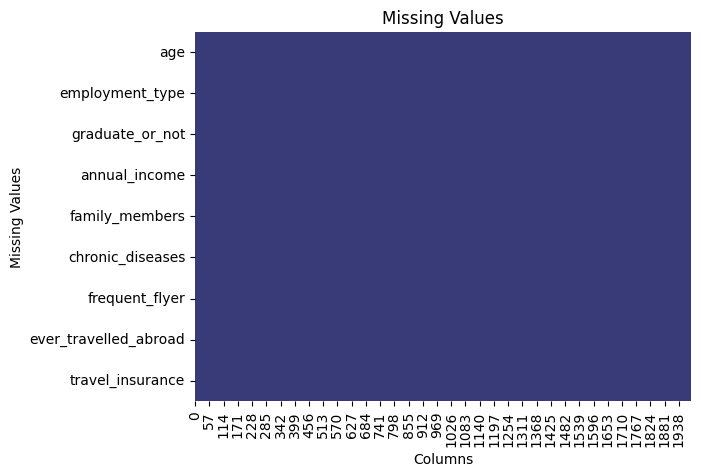

In [ ]:
ax = plt.axes()
sns.heatmap(df.isnull().transpose(), cbar=False, ax=ax, cmap = 'tab20b')
plt.title('Missing Values', fontsize=12)
plt.xlabel('Columns', fontsize = 10)
plt.ylabel('Missing Values', fontsize = 10)
plt.show()

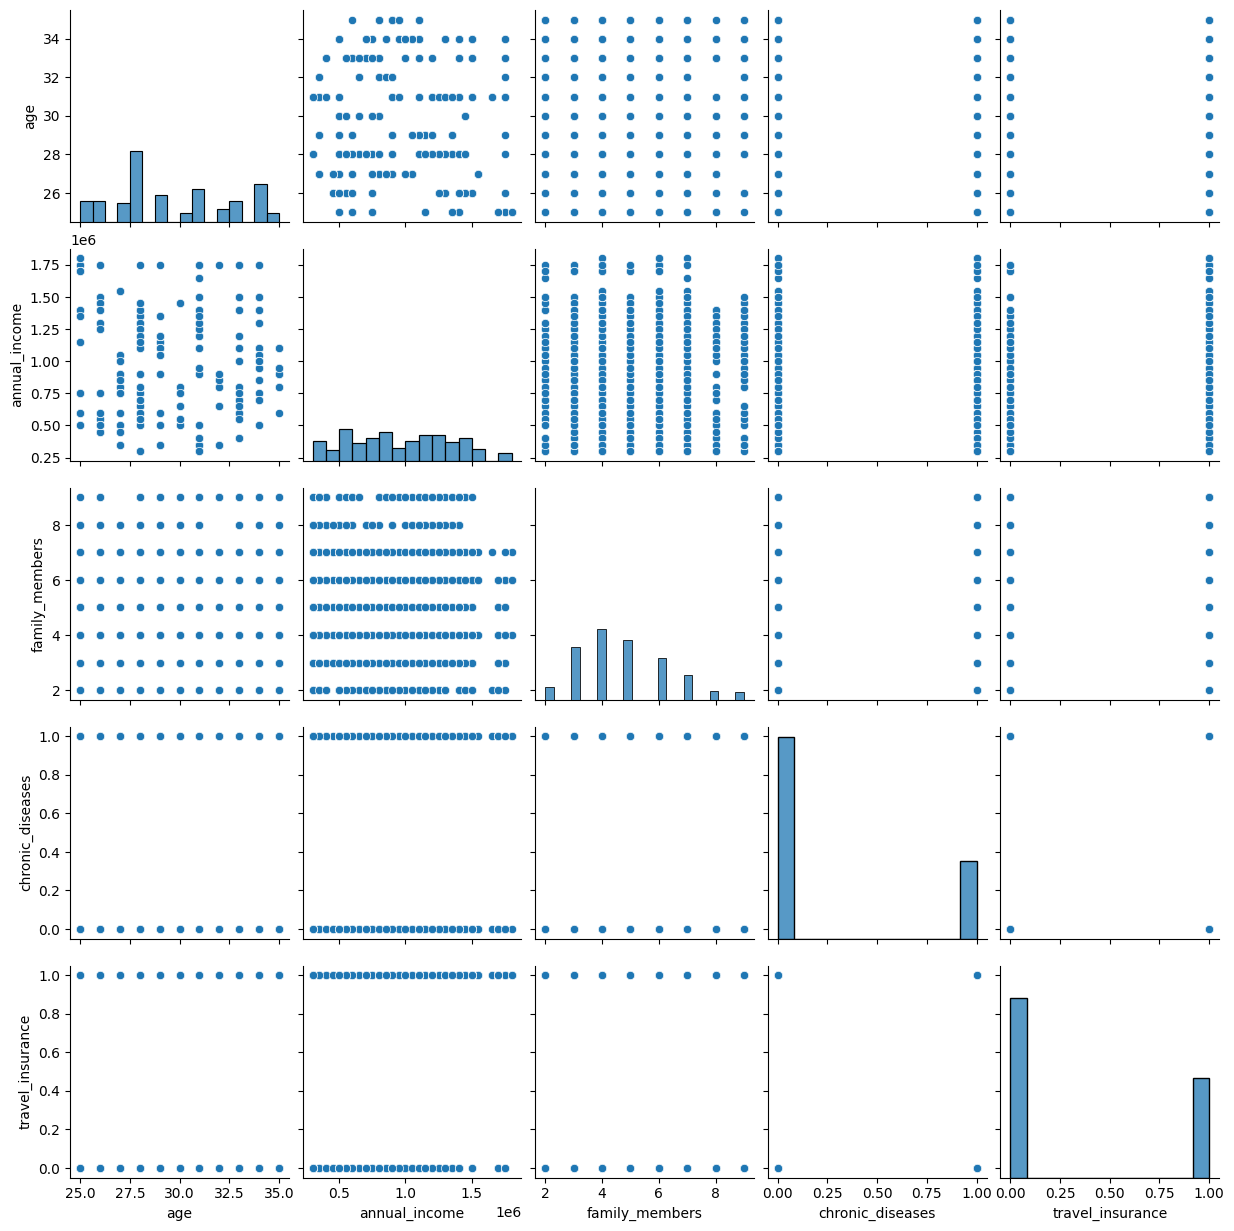

In [ ]:
#seperate dataframe for numerical values
df_num = df.select_dtypes(include='number')
sns.pairplot(df_num)

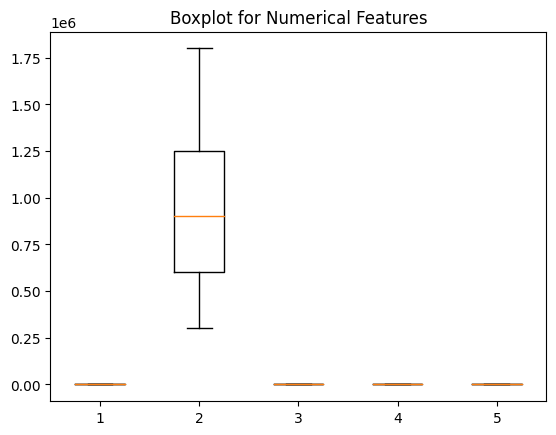

In [ ]:
plt.boxplot(df_num)
plt.title('Boxplot for Numerical Features')
plt.show()

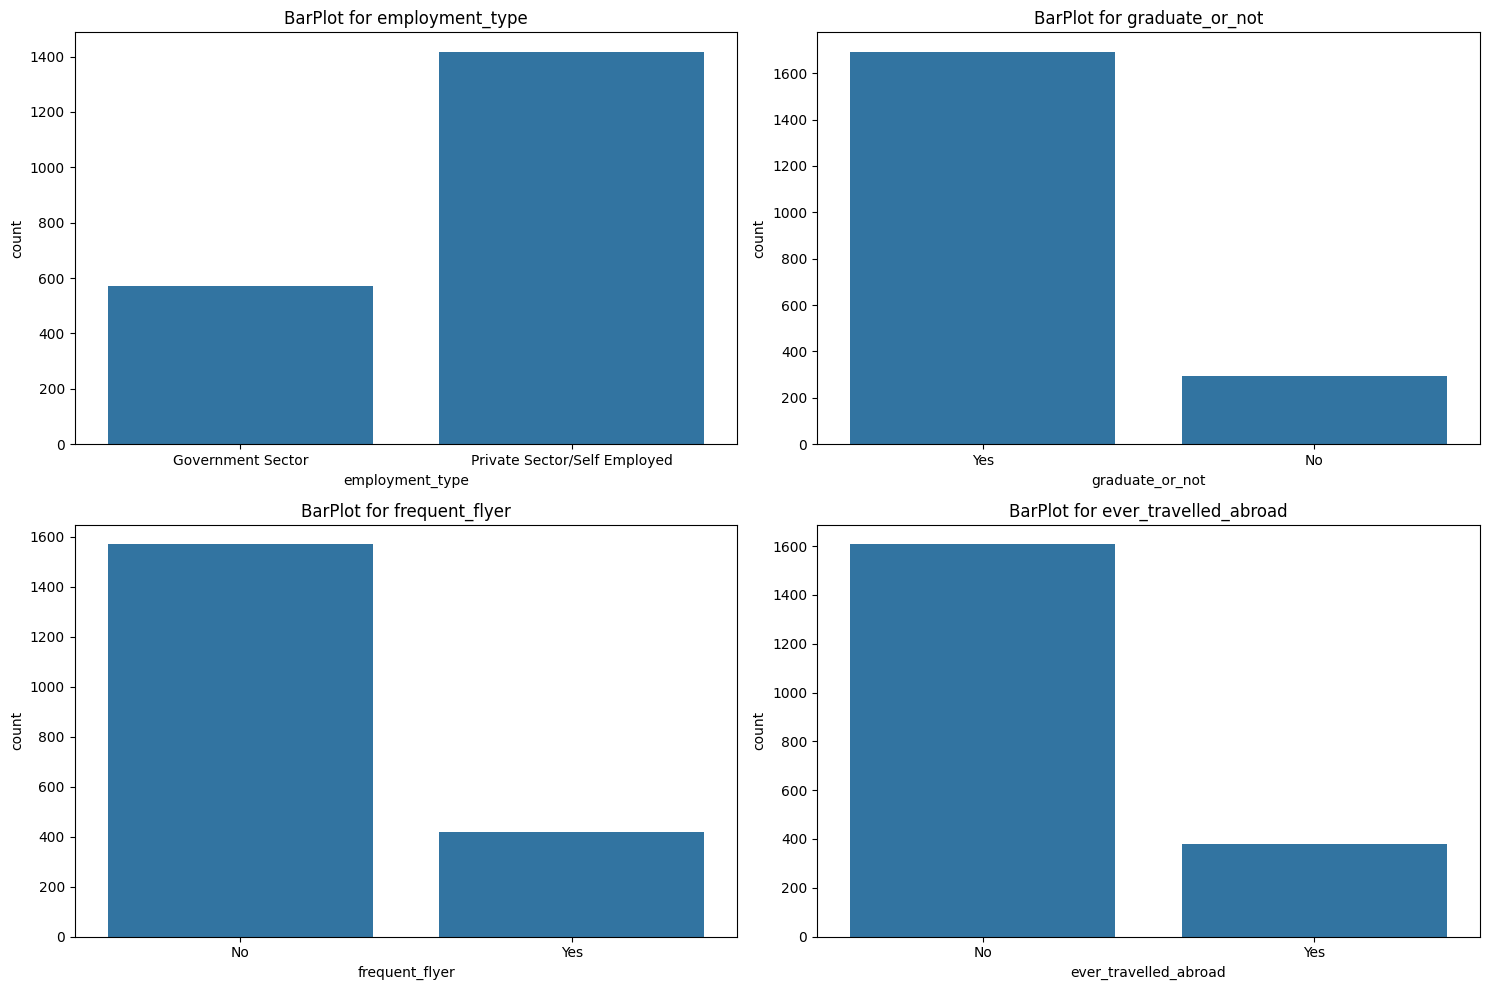

In [ ]:
# barplots for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(df_cat.columns):
    sns.countplot(x=column, data=df_cat, ax=axes[i])
    axes[i].set_title(f'BarPlot for {column}')

plt.tight_layout()
plt.show()

In [ ]:
#No. of outliers in each column

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = (df_num < lower) | (df_num > upper)

outlier_columns = pd.DataFrame({
    'Outliers': outliers.sum(axis=0)
})

print("Outlier Summary:\n", outlier_columns)

Outlier Summary:
                   Outliers
age                      0
annual_income            0
family_members           0
chronic_diseases         0
travel_insurance         0


In [ ]:
matrix = df_num.corr()
print(matrix)

                       age  annual_income  family_members  chronic_diseases  \
age               1.000000      -0.020101        0.027409          0.007359   
annual_income    -0.020101       1.000000       -0.015367         -0.001149   
family_members    0.027409      -0.015367        1.000000          0.028209   
chronic_diseases  0.007359      -0.001149        0.028209          1.000000   
travel_insurance  0.061060       0.396763        0.079909          0.018190   

                  travel_insurance  
age                       0.061060  
annual_income             0.396763  
family_members            0.079909  
chronic_diseases          0.018190  
travel_insurance          1.000000  


<Axes: >

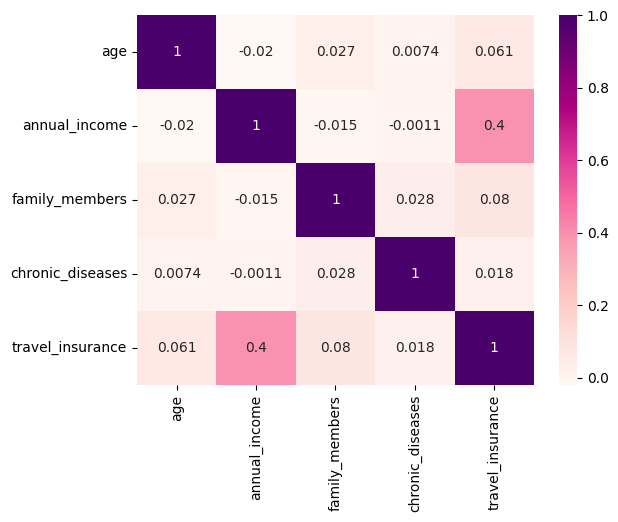

In [ ]:
sns.heatmap(matrix, cmap="RdPu", annot=True)

#Transforming Categorical to Numerical

In [ ]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employment_type        1987 non-null   object
 1   graduate_or_not        1987 non-null   object
 2   frequent_flyer         1987 non-null   object
 3   ever_travelled_abroad  1987 non-null   object
dtypes: object(4)
memory usage: 62.2+ KB


In [ ]:
label_encode = preprocessing.LabelEncoder()
df_catToNum = df.copy()
df['graduate_or_not_encoded'] = label_encode.fit_transform(df['graduate_or_not'])
df['frequent_flyer_encoded'] = label_encode.fit_transform(df['frequent_flyer'])
df['ever_travelled_abroad_encoded'] = label_encode.fit_transform(df['ever_travelled_abroad'])

one_hot_encoder = OneHotEncoder(sparse=False)
employment_type_encoded = one_hot_encoder.fit_transform(df[['employment_type']])
employment_type_categories = one_hot_encoder.categories_[0]
employment_type_encoded_df = pd.DataFrame(employment_type_encoded, columns=[f'employment_type_{cat}' for cat in employment_type_categories])

# Combine encoded columns with the original DataFrame
df_encoded = pd.concat([df.drop(['employment_type'], axis=1), employment_type_encoded_df], axis=1)

# Print the encoded DataFrame
df_encoded.head(10)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


age graduate_or_not  annual_income  family_members  chronic_diseases  \
0   31             Yes         400000               6                 1   
1   31             Yes        1250000               7                 0   
2   34             Yes         500000               4                 1   
3   28             Yes         700000               3                 1   
4   28             Yes         700000               8                 1   
5   25              No        1150000               4                 0   
6   31             Yes        1300000               4                 0   
7   31             Yes        1350000               3                 0   
8   28             Yes        1450000               6                 1   
9   33             Yes         800000               3                 0   

  frequent_flyer ever_travelled_abroad  travel_insurance  \
0             No                    No                 0   
1             No                    No                 0   
2             No                    No                 1   
3             No                    No                 0   
4            Yes                    No                 0   
5             No                    No                 0   
6             No                    No                 0   
7            Yes                   Yes                 1   
8            Yes                   Yes                 1   
9            Yes                    No                 0   

   graduate_or_not_encoded  frequent_flyer_encoded  \
0                        1                       0   
1                        1                       0   
2                        1                       0   
3                        1                       0   
4                        1                       1   
5                        0                       0   
6                        1                       0   
7                        1                       1   
8                        1                       1   
9                        1                       1   

   ever_travelled_abroad_encoded  employment_type_Government Sector  \
0                              0                                1.0   
1                              0                                0.0   
2                              0                                0.0   
3                              0                                0.0   
4                              0                                0.0   
5                              0                                0.0   
6                              0                                1.0   
7                              1                                0.0   
8                              1                                0.0   
9                              0                                1.0   

   employment_type_Private Sector/Self Employed  
0                                           0.0  
1                                           1.0  
2                                           1.0  
3                                           1.0  
4                                           1.0  
5                                           1.0  
6                                           0.0  
7                                           1.0  
8                                           1.0  
9                                           0.0

In [ ]:
columns_to_drop = ['graduate_or_not', 'frequent_flyer', 'ever_travelled_abroad']
df_combo = df_encoded.drop(columns=columns_to_drop)
df_combo.head(10)

age  annual_income  family_members  chronic_diseases  travel_insurance  \
0   31         400000               6                 1                 0   
1   31        1250000               7                 0                 0   
2   34         500000               4                 1                 1   
3   28         700000               3                 1                 0   
4   28         700000               8                 1                 0   
5   25        1150000               4                 0                 0   
6   31        1300000               4                 0                 0   
7   31        1350000               3                 0                 1   
8   28        1450000               6                 1                 1   
9   33         800000               3                 0                 0   

   graduate_or_not_encoded  frequent_flyer_encoded  \
0                        1                       0   
1                        1                       0   
2                        1                       0   
3                        1                       0   
4                        1                       1   
5                        0                       0   
6                        1                       0   
7                        1                       1   
8                        1                       1   
9                        1                       1   

   ever_travelled_abroad_encoded  employment_type_Government Sector  \
0                              0                                1.0   
1                              0                                0.0   
2                              0                                0.0   
3                              0                                0.0   
4                              0                                0.0   
5                              0                                0.0   
6                              0                                1.0   
7                              1                                0.0   
8                              1                                0.0   
9                              0                                1.0   

   employment_type_Private Sector/Self Employed  
0                                           0.0  
1                                           1.0  
2                                           1.0  
3                                           1.0  
4                                           1.0  
5                                           1.0  
6                                           0.0  
7                                           1.0  
8                                           1.0  
9                                           0.0

In [ ]:
df_combo.columns

Index(['age', 'annual_income', 'family_members', 'chronic_diseases',
       'travel_insurance', 'graduate_or_not_encoded', 'frequent_flyer_encoded',
       'ever_travelled_abroad_encoded', 'employment_type_Government Sector',
       'employment_type_Private Sector/Self Employed'],
      dtype='object')

In [ ]:
df_combo.columns = ['age', 'annual_income', 'family_members', 'chronic_diseases', 'travel_insurance','graduate_or_not_enc','frequent_flyer_enc','ever_travel_abroad_enc'
,'emp_type_gov','emp_type_priv_self']
print(df_combo.columns)

Index(['age', 'annual_income', 'family_members', 'chronic_diseases',
       'travel_insurance', 'graduate_or_not_enc', 'frequent_flyer_enc',
       'ever_travel_abroad_enc', 'emp_type_gov', 'emp_type_priv_self'],
      dtype='object')


In [ ]:
matrix_combo = df_combo.corr()
print(matrix_combo)

                             age  annual_income  family_members  \
age                     1.000000      -0.020101        0.027409   
annual_income          -0.020101       1.000000       -0.015367   
family_members          0.027409      -0.015367        1.000000   
chronic_diseases        0.007359      -0.001149        0.028209   
travel_insurance        0.061060       0.396763        0.079909   
graduate_or_not_enc     0.027125       0.108066        0.021201   
frequent_flyer_enc     -0.033159       0.353087       -0.023775   
ever_travel_abroad_enc -0.012779       0.486043       -0.020755   
emp_type_gov            0.115134      -0.349157        0.003354   
emp_type_priv_self     -0.115134       0.349157       -0.003354   

                        chronic_diseases  travel_insurance  \
age                             0.007359          0.061060   
annual_income                  -0.001149          0.396763   
family_members                  0.028209          0.079909   
chronic_diseas

<Axes: >

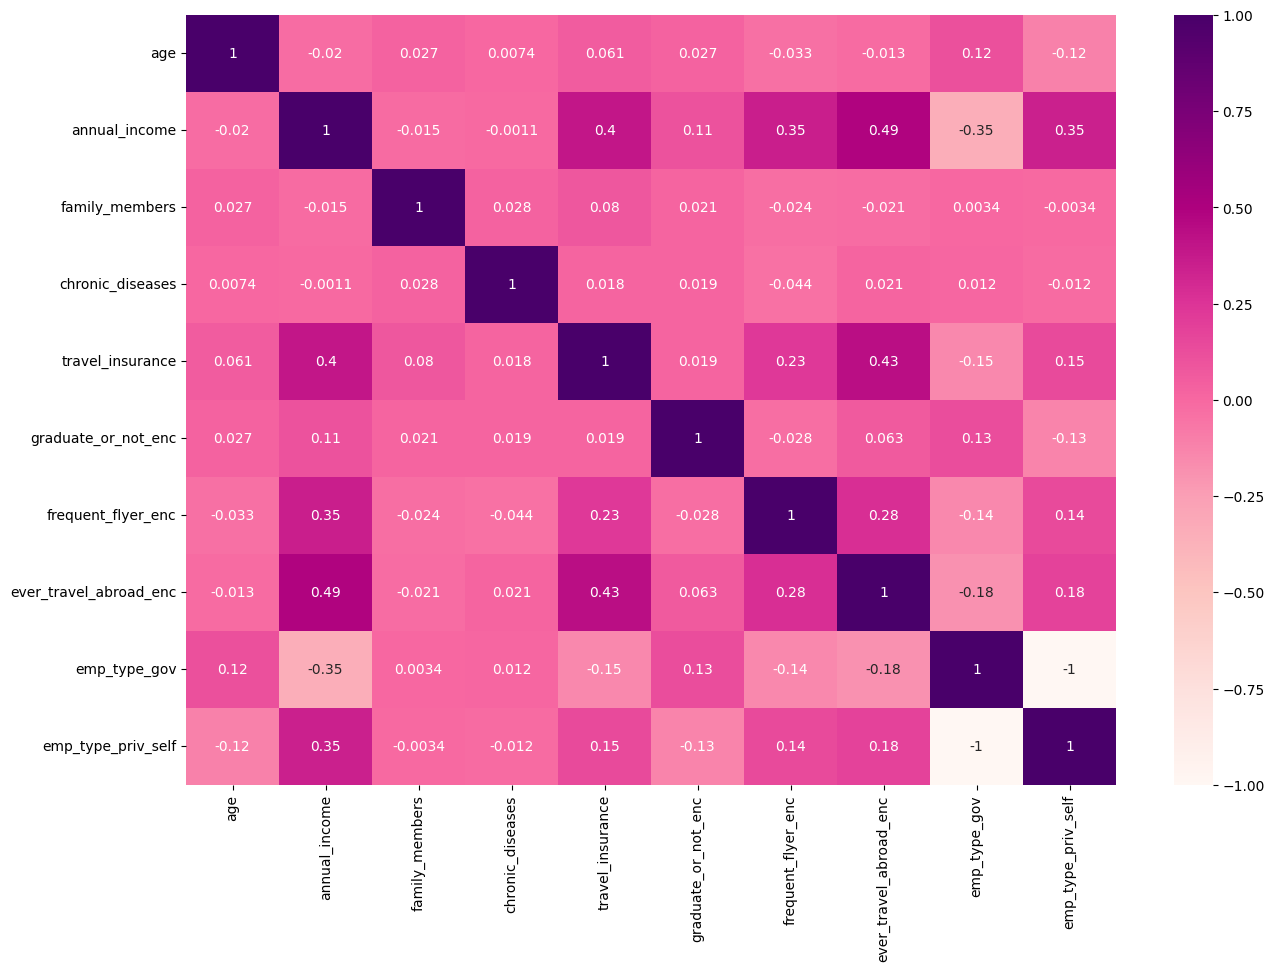

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(matrix_combo, cmap="RdPu", annot=True)

# Imbalance Checking & ADASYN

Class distribution:
travel_insurance
0    1277
1     710
Name: count, dtype: int64


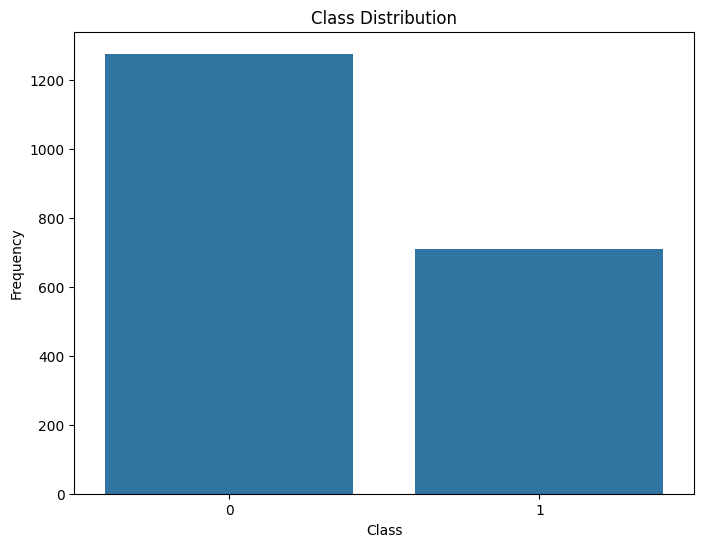

In [ ]:
# Splitting the dataset into features (X) and target (y)
X = df_combo.drop('travel_insurance', axis=1)
y = df_combo['travel_insurance']

# Check for imbalance
class_counts = y.value_counts()
print("Class distribution:")
print(class_counts)

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

In [ ]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

print("\nOriginal dataset shape:", y_train.value_counts())
print("\nResampled dataset shape:", y_train_resampled.value_counts())



Original dataset shape: travel_insurance
0    1020
1     569
Name: count, dtype: int64

Resampled dataset shape: travel_insurance
0    1020
1     973
Name: count, dtype: int64


# Decision Tree

## DT Experiment 1(a)
Model on Balanced Dataset

In [ ]:
print(df_combo.columns)

Index(['age', 'annual_income', 'family_members', 'chronic_diseases',
       'travel_insurance', 'graduate_or_not_enc', 'frequent_flyer_enc',
       'ever_travel_abroad_enc', 'emp_type_gov', 'emp_type_priv_self'],
      dtype='object')


In [ ]:
#validation of data splits
print("X_train_resampled shape:", X_train_resampled.shape)
print("X_test shape:", X_test.shape)
print("y_train_resampled shape:", y_train_resampled.shape)
print("y_test shape:", y_test.shape)

X_train_resampled shape: (1993, 9)
X_test shape: (398, 9)
y_train_resampled shape: (1993,)
y_test shape: (398,)


In [ ]:
#fitting the model on balanced dataset
DT = DecisionTreeClassifier(random_state=42)
DT_01=DT.fit(X_train_resampled, y_train_resampled)

y_train_preds = DT_01.predict(X_train_resampled)
y_test_preds = DT_01.predict(X_test)

Train set: 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89      1020
           1       0.91      0.85      0.88       973

    accuracy                           0.89      1993
   macro avg       0.89      0.89      0.89      1993
weighted avg       0.89      0.89      0.89      1993



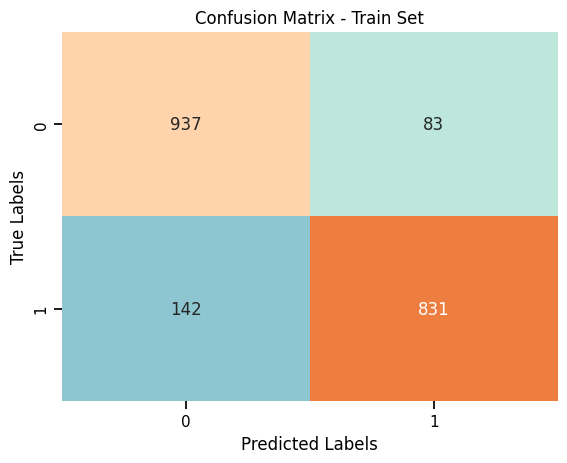

In [ ]:
print('Train set: \n', classification_report(y_train_resampled, y_train_preds))
cm_train = confusion_matrix(y_train_resampled, y_train_preds)
sns.set_context('notebook')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.81      0.77      0.79       257
           1       0.62      0.68      0.65       141

    accuracy                           0.74       398
   macro avg       0.72      0.73      0.72       398
weighted avg       0.75      0.74      0.74       398



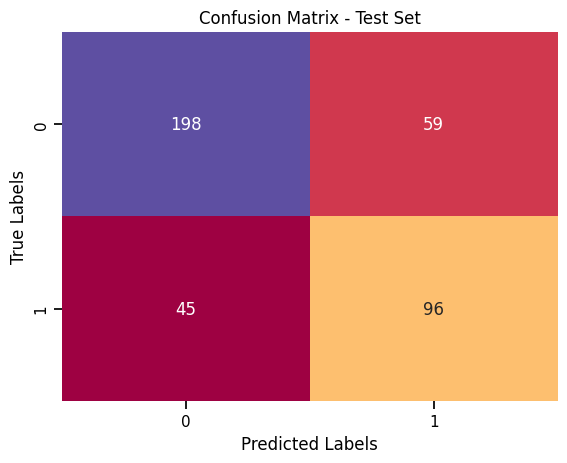

In [ ]:
print('Test set: \n', classification_report(y_test, y_test_preds))
cm_test = confusion_matrix(y_test, y_test_preds)
sns.set_context('notebook')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
plt.figure(figsize=(50,40), dpi=300)
plot_tree(DT_01, filled=True, feature_names=X_train_resampled.columns, class_names=['0', '1'], rounded=True)
plt.title("Decision Tree")
plt.show()

In [ ]:
#find out depth of tree and number of nodes
depth_of_tree = DT_01.tree_.max_depth
number_of_nodes = DT_01.tree_.node_count

print(f"Depth of the Decision Tree: {depth_of_tree}")
print(f"Number of nodes in the Decision Tree: {number_of_nodes}")

Depth of the Decision Tree: 22
Number of nodes in the Decision Tree: 1009


In [ ]:
#identifying key features used for splitting
feature_importances = DT_01.feature_importances_
feature_names = X_train_resampled.columns
feature_importance_list = sorted(zip(feature_importances, feature_names), reverse=True)

print("Feature Importances:")
for importance, feature_name in feature_importance_list:
    print(f"{feature_name}: {importance:.4f}")

Feature Importances:
annual_income: 0.4164
family_members: 0.2353
age: 0.1407
emp_type_gov: 0.0460
chronic_diseases: 0.0439
frequent_flyer_enc: 0.0327
emp_type_priv_self: 0.0320
graduate_or_not_enc: 0.0292
ever_travel_abroad_enc: 0.0237


## DT Experiment 1(b)
Model on Unbalanced Dataset

In [ ]:
#validation of data splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1589, 9)
X_test shape: (398, 9)
y_train shape: (1589,)
y_test shape: (398,)


In [ ]:
#fitting the model on unbalanced dataset
DT = DecisionTreeClassifier(random_state=42)
DT_02=DT.fit(X_train, y_train)

y_train_preds2 = DT_02.predict(X_train)
y_test_preds2 = DT_02.predict(X_test)

Train set: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      1020
           1       0.97      0.81      0.88       569

    accuracy                           0.92      1589
   macro avg       0.94      0.90      0.91      1589
weighted avg       0.93      0.92      0.92      1589



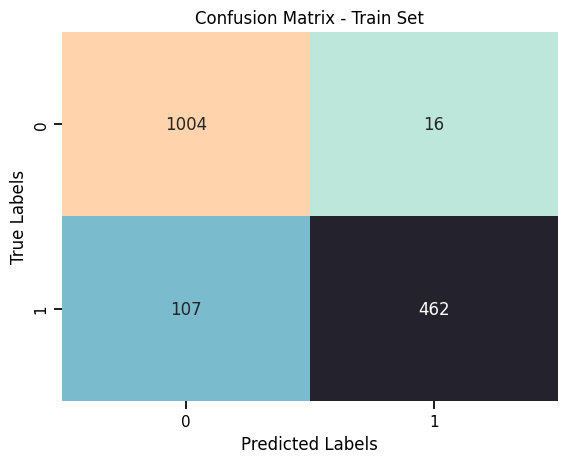

In [ ]:
print('Train set: \n', classification_report(y_train, y_train_preds2))
cm_train2 = confusion_matrix(y_train, y_train_preds2)
sns.set_context('notebook')
sns.heatmap(cm_train2, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       257
           1       0.76      0.66      0.71       141

    accuracy                           0.81       398
   macro avg       0.79      0.77      0.78       398
weighted avg       0.80      0.81      0.80       398



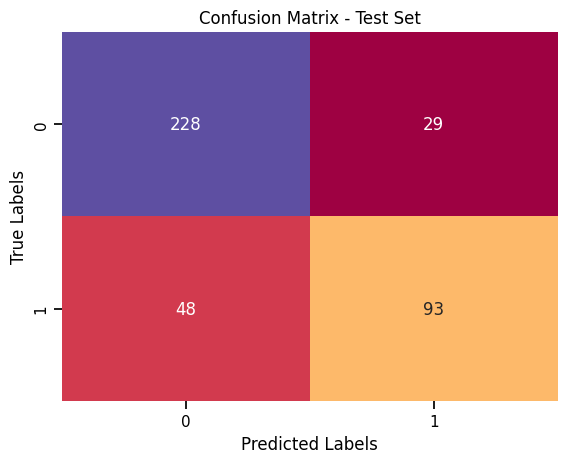

In [ ]:
print('Test set: \n', classification_report(y_test, y_test_preds2))
cm_test2 = confusion_matrix(y_test, y_test_preds2)
sns.set_context('notebook')
sns.heatmap(cm_test2, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
#identifying key features used for splitting
feature_importances = DT_02.feature_importances_
feature_names = X_train.columns
feature_importance_list = sorted(zip(feature_importances, feature_names), reverse=True)

print("Feature Importances:")
for importance, feature_name in feature_importance_list:
    print(f"{feature_name}: {importance:.4f}")

Feature Importances:
annual_income: 0.5076
family_members: 0.2460
age: 0.1101
chronic_diseases: 0.0424
frequent_flyer_enc: 0.0361
graduate_or_not_enc: 0.0197
ever_travel_abroad_enc: 0.0163
emp_type_gov: 0.0142
emp_type_priv_self: 0.0077


## DT Experiment 1(C)
Model on Unalanced Dataset with Selected Features

In [ ]:
X3 = df_combo [['family_members', 'annual_income', 'age']]
y = df_combo['travel_insurance']

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

#fitting the model on unbalanced dataset
DT = DecisionTreeClassifier(random_state=42)
DT_03=DT.fit(X3_train, y_train)

y_train_preds3 = DT_03.predict(X3_train)
y_test_preds3 = DT_03.predict(X3_test)

Train set: 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91      1020
           1       0.93      0.70      0.80       569

    accuracy                           0.87      1589
   macro avg       0.89      0.84      0.85      1589
weighted avg       0.88      0.87      0.87      1589



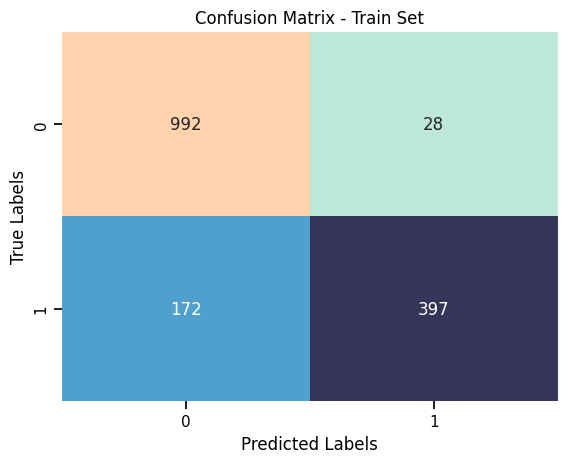

In [ ]:
print('Train set: \n', classification_report(y_train, y_train_preds3))
cm_train3 = confusion_matrix(y_train, y_train_preds3)
sns.set_context('notebook')
sns.heatmap(cm_train3, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       257
           1       0.87      0.63      0.73       141

    accuracy                           0.84       398
   macro avg       0.85      0.79      0.81       398
weighted avg       0.84      0.84      0.83       398



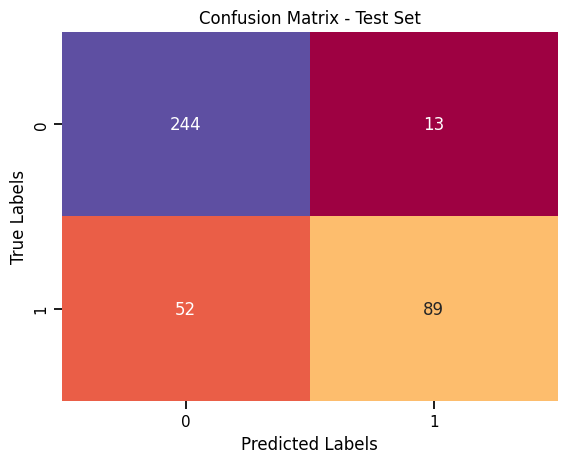

In [ ]:
print('Test set: \n', classification_report(y_test, y_test_preds3))
cm_test3 = confusion_matrix(y_test, y_test_preds3)
sns.set_context('notebook')
sns.heatmap(cm_test3, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## DT Experiment 1(d)
Pruning on Unbalanced Dataset

In [ ]:
params_grid={
    'criterion':['gini','entropy'],
    'max_depth':[5,10,15,20],
    'min_samples_leaf':[1,2,5]
}

In [ ]:
model=DecisionTreeClassifier(random_state=42)

In [ ]:
#defining a GridSearchCV

grid_search=GridSearchCV(estimator=model,param_grid=params_grid,scoring='f1',cv=5)

In [ ]:
#search best parameters

grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 5]},
             scoring='f1')

In [ ]:
best_params=grid_search.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1}

Train set: 
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      1020
           1       0.93      0.59      0.72       569

    accuracy                           0.84      1589
   macro avg       0.87      0.78      0.80      1589
weighted avg       0.85      0.84      0.83      1589



<Axes: >

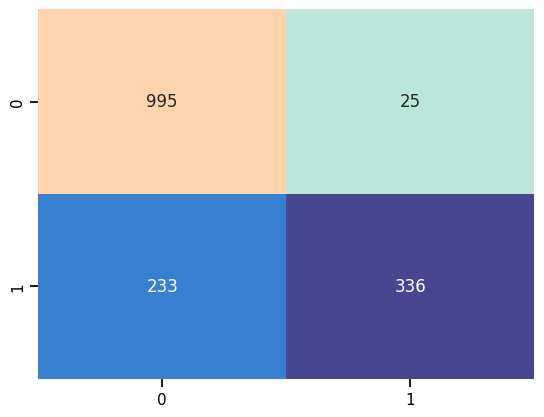

In [ ]:
#optimising model
DT_04=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=1,random_state=42)
DT_05=DT_04.fit(X_train,y_train)

y_train_preds4=DT_05.predict(X_train)
y_test_preds4=DT_05.predict(X_test)

print('Train set: \n', metrics.classification_report(y_train, y_train_preds4))
cm_train4 = metrics.confusion_matrix(y_train, y_train_preds4)
sns.set_context('notebook')
sns.heatmap(cm_train4, annot=True, fmt='d', cmap='icefire', cbar=False)

# Random Forest

In [ ]:
print(df_combo.columns)

Index(['age', 'annual_income', 'family_members', 'chronic_diseases',
       'travel_insurance', 'graduate_or_not_enc', 'frequent_flyer_enc',
       'ever_travel_abroad_enc', 'emp_type_gov', 'emp_type_priv_self'],
      dtype='object')


In [ ]:
# Initialize and train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

y_train_preds = rf.predict(X_train_resampled)
y_test_preds = rf.predict(X_test)

Train set: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      1020
           1       0.87      0.90      0.89       973

    accuracy                           0.89      1993
   macro avg       0.89      0.89      0.89      1993
weighted avg       0.89      0.89      0.89      1993



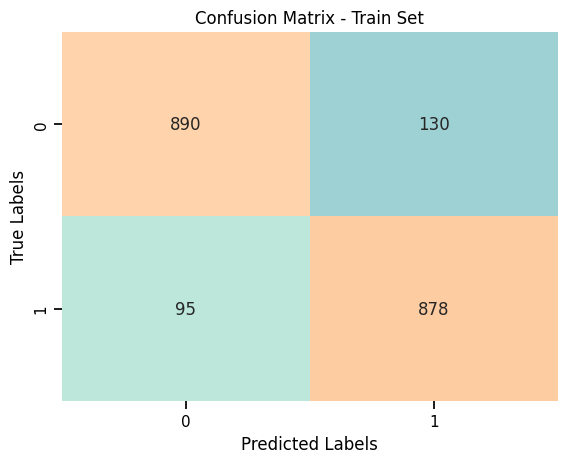

In [ ]:
# Evaluate Train model
print('Train set: \n', classification_report(y_train_resampled, y_train_preds))
cm_train = confusion_matrix(y_train_resampled, y_train_preds)
sns.set_context('notebook')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       257
           1       0.67      0.69      0.68       141

    accuracy                           0.77       398
   macro avg       0.75      0.75      0.75       398
weighted avg       0.77      0.77      0.77       398



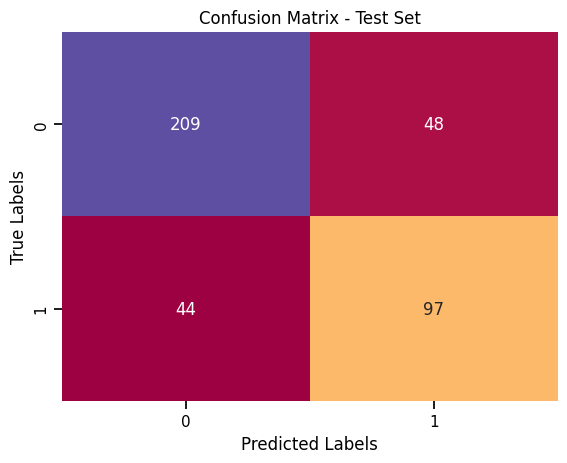

In [ ]:
#Evaluate Test model
print('Test set: \n', classification_report(y_test, y_test_preds))
cm_test = confusion_matrix(y_test, y_test_preds)
sns.set_context('notebook')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Experiment 2a

Hyperparameter Tuning

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 200}
Train set: 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      1020
           1       0.87      0.90      0.89       973

    accuracy                           0.89      1993
   macro avg       0.89      0.89      0.89      1993
weighted avg       0.89      0.89      0.89      1993

Test set: 
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       257
           1       0.66      0.70      0.68       141

    accuracy                           0.76       398
   macro avg       0.74      0.75      0.75       398
weighted avg       0.77      0.76      0.77       398



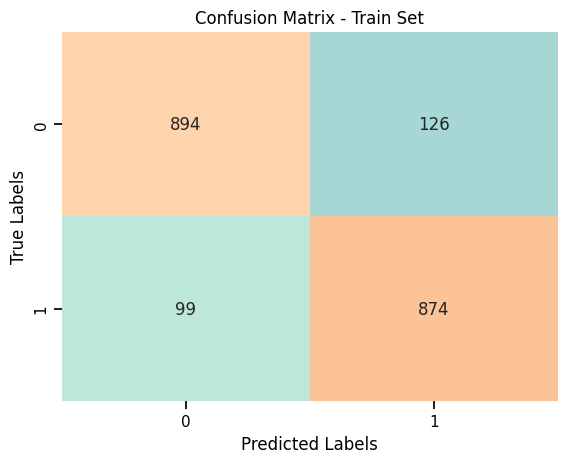

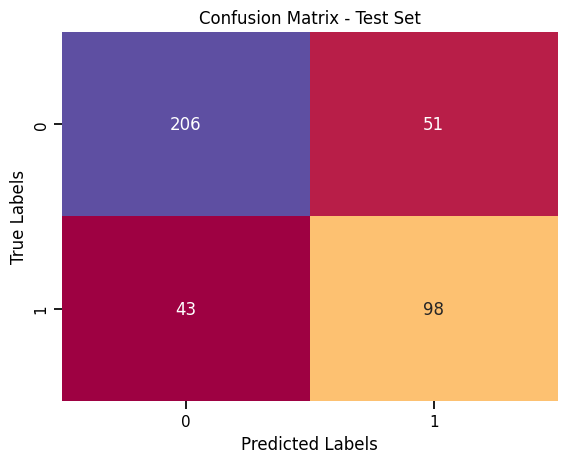

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Best estimator
best_rf = grid_search.best_estimator_

# Evaluate the best estimator
y_train_preds = best_rf.predict(X_train_resampled)
y_test_preds = best_rf.predict(X_test)

# Print classification reports
print('Train set: \n', classification_report(y_train_resampled, y_train_preds))
print('Test set: \n', classification_report(y_test, y_test_preds))

# Plot confusion matrices
sns.heatmap(confusion_matrix(y_train_resampled, y_train_preds), annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

sns.heatmap(confusion_matrix(y_test, y_test_preds), annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Experiment 2b

Feature Importance

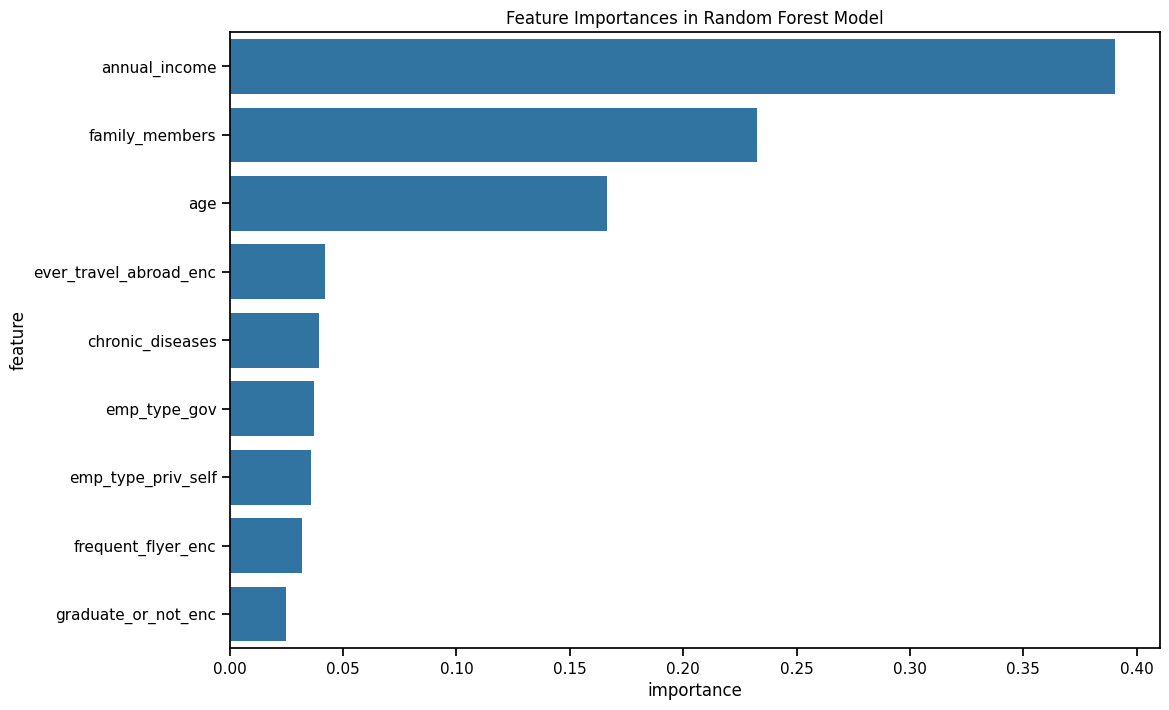

In [ ]:
# Train the Random Forest model
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_resampled, y_train_resampled)

# Get feature importances
importances = rf.feature_importances_
feature_names = df_combo.columns.drop('travel_insurance')

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances in Random Forest Model')
plt.show()

# KNN

In [ ]:
print(df_combo.columns)

Index(['age', 'annual_income', 'family_members', 'chronic_diseases',
       'travel_insurance', 'graduate_or_not_enc', 'frequent_flyer_enc',
       'ever_travel_abroad_enc', 'emp_type_gov', 'emp_type_priv_self'],
      dtype='object')


In [ ]:
# Initialize KNN classifier with k=9
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test)

# Predictions for training set
y_train_preds = knn.predict(X_train_resampled)
# Predictions for test set
y_test_preds = knn.predict(X_test)

Train set: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1020
           1       0.79      0.76      0.77       973

    accuracy                           0.78      1993
   macro avg       0.78      0.78      0.78      1993
weighted avg       0.78      0.78      0.78      1993



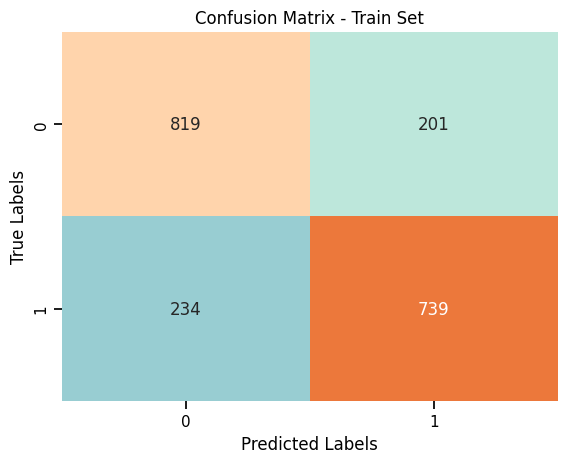

In [ ]:
# Confusion matrix for training set
print('Train set: \n', classification_report(y_train_resampled, y_train_preds))
cm_train = confusion_matrix(y_train_resampled, y_train_preds)
sns.set_context('notebook')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       257
           1       0.61      0.73      0.67       141

    accuracy                           0.74       398
   macro avg       0.72      0.74      0.73       398
weighted avg       0.76      0.74      0.75       398



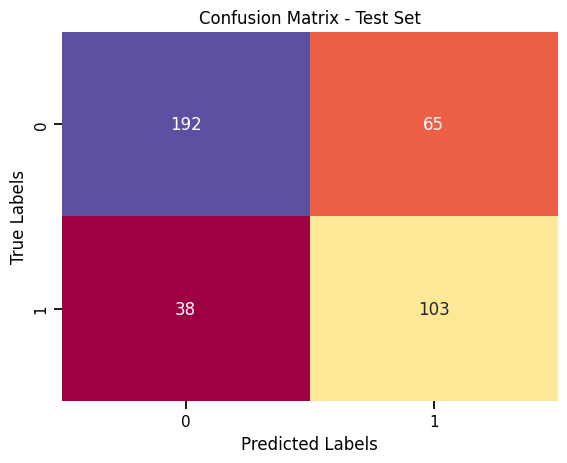

In [ ]:
# Confusion matrix for test set
print('Test set: \n', classification_report(y_test, y_test_preds))
cm_test = confusion_matrix(y_test, y_test_preds)
sns.set_context('notebook')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Train set: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1020
           1       0.79      0.76      0.77       973

    accuracy                           0.78      1993
   macro avg       0.78      0.78      0.78      1993
weighted avg       0.78      0.78      0.78      1993



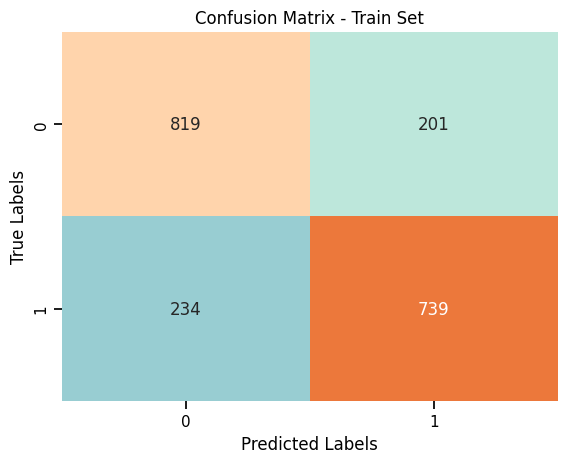

In [ ]:
# Confusion matrix for training set
print('Train set: \n', classification_report(y_train_resampled, y_train_preds))
cm_train = confusion_matrix(y_train_resampled, y_train_preds)
sns.set_context('notebook')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       257
           1       0.61      0.73      0.67       141

    accuracy                           0.74       398
   macro avg       0.72      0.74      0.73       398
weighted avg       0.76      0.74      0.75       398



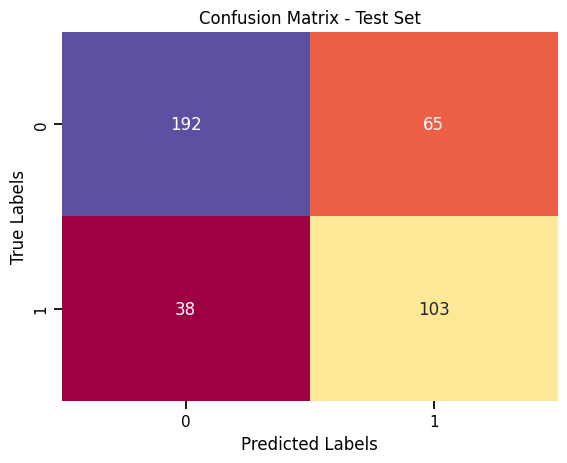

In [ ]:
# Confusion matrix for test set
print('Test set: \n', classification_report(y_test, y_test_preds))
cm_test = confusion_matrix(y_test, y_test_preds)
sns.set_context('notebook')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Experiment 3a

Hyperparameter Tuning: Finding optimal k-value

In [ ]:
# List to store accuracies for different k values
train_accuracies = []
test_accuracies = []

In [ ]:
# Range of k values to test
k_values = range(1, 21)

In [ ]:
for k in k_values:
    print(f"Training KNN with k={k}")

    # Initialize KNN classifier with current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_train_preds = knn.predict(X_train_resampled)
    y_test_preds = knn.predict(X_test)

    # Calculate accuracy for training and test sets
    train_accuracy = accuracy_score(y_train_resampled, y_train_preds)
    test_accuracy = accuracy_score(y_test, y_test_preds)

    # Store accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

Training KNN with k=1
Training KNN with k=2
Training KNN with k=3
Training KNN with k=4
Training KNN with k=5
Training KNN with k=6
Training KNN with k=7
Training KNN with k=8
Training KNN with k=9
Training KNN with k=10
Training KNN with k=11
Training KNN with k=12
Training KNN with k=13
Training KNN with k=14
Training KNN with k=15
Training KNN with k=16
Training KNN with k=17
Training KNN with k=18
Training KNN with k=19
Training KNN with k=20


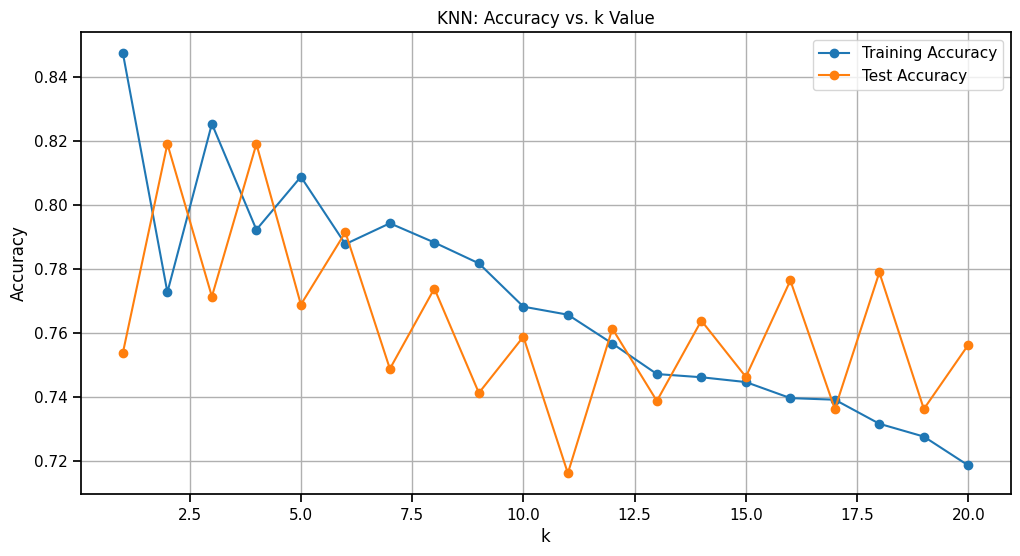

In [ ]:
# Plot the accuracies for different k values
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs. k Value')
plt.legend()
plt.grid(True)
plt.show()

Based on the graph, the k-value = 4 is the best for this KNN model, since it has the highest accuracy for test model, and compaing k=2 which also has the highest accuracy, k=4 has higher training accuracy.

In [ ]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=4)

# Train the model
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = knn.predict(X_test)

# Predictions for training set
y_train_preds = knn.predict(X_train_resampled)
# Predictions for test set
y_test_preds = knn.predict(X_test)

Train set: 
               precision    recall  f1-score   support

           0       0.73      0.94      0.82      1020
           1       0.92      0.63      0.75       973

    accuracy                           0.79      1993
   macro avg       0.82      0.79      0.79      1993
weighted avg       0.82      0.79      0.79      1993



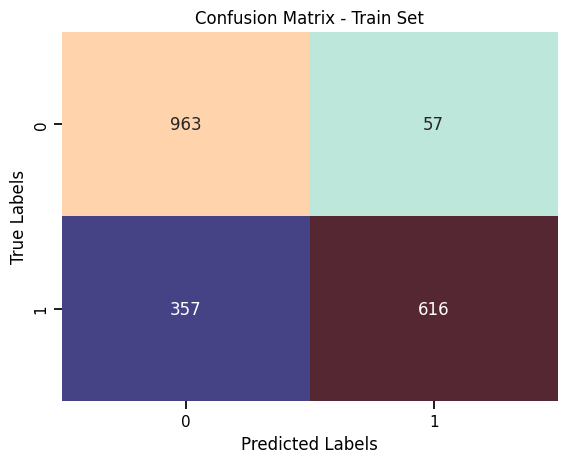

In [ ]:
# Confusion matrix for training set
print('Train set: \n', classification_report(y_train_resampled, y_train_preds))
cm_train = confusion_matrix(y_train_resampled, y_train_preds)
sns.set_context('notebook')
sns.heatmap(cm_train, annot=True, fmt='d', cmap='icefire', cbar=False)
plt.title('Confusion Matrix - Train Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Test set: 
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       257
           1       0.81      0.64      0.71       141

    accuracy                           0.82       398
   macro avg       0.82      0.78      0.79       398
weighted avg       0.82      0.82      0.81       398



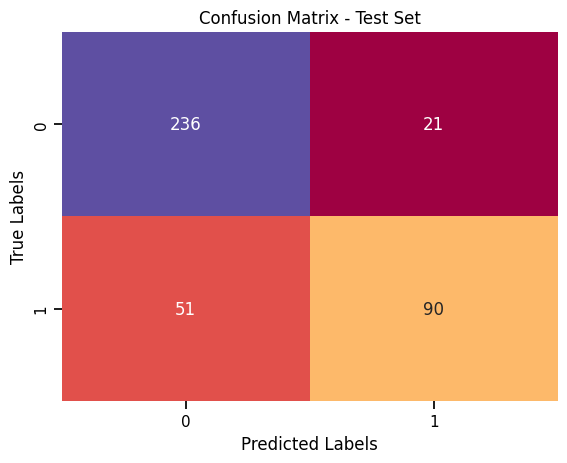

In [ ]:
# Confusion matrix for test set
print('Test set: \n', classification_report(y_test, y_test_preds))
cm_test = confusion_matrix(y_test, y_test_preds)
sns.set_context('notebook')
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Spectral', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Experiment 3b

Cross-validation

In [ ]:
# Initialize KNN classifier with the optimal k
knn = KNeighborsClassifier(n_neighbors=4)

# Perform cross-validation
cv_scores = cross_val_score(knn, X_train_resampled, y_train_resampled, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')

Cross-validation scores: [0.76942356 0.7518797  0.76190476 0.59045226 0.60050251]
Mean cross-validation score: 0.6948325587838944
